# Лабораторная работа по предмету Численные методы №1 
### "Методы решения задач линейной алгебры"
**Судент**: Титеев Рамиль \
**Группа**: М8О-305Б-21\
Вариант 26

Импортируем библиотеки, для дальнейшей работы с ними

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 1.1

Реализовать алгоритм LU -  разложения матриц (с выбором главного элемента)
в виде программы. Используя разработанное программное обеспечение, решить
систему линейных алгебраических уравнений (СЛАУ). Для матрицы СЛАУ
вычислить определитель и обратную матрицу.


1. Реализуем функцию LU-разложения матрицы

In [2]:
def lu_decomposition(matrix: list[list[int]]):
    """Функция LU-разложения матрицы

    Args:
        - matrix (list[list[int]]): Исходная матрица

    Returns:
        - tuple[list[list[float]], list[list[float]]]: Возвращает две матрицы
        Lower и Upper
    """
    n = len(matrix)
    lower = [[0.0] * n for _ in range(n)]
    upper = [[0.0] * n for _ in range(n)]

    for i in range(n):
        lower[i][i] = 1.0

    for k in range(n):
        for j in range(k, n):
            sum_val = sum(lower[k][s] * upper[s][j] for s in range(k))
            upper[k][j] = matrix[k][j] - sum_val

        for i in range(k + 1, n):
            sum_val = sum(lower[i][s] * upper[s][k] for s in range(k))
            lower[i][k] = (matrix[i][k] - sum_val) / upper[k][k]

    return lower, upper

2. Реализуем функции расчета произведения матриц

In [3]:
def forward_substitution(lower: list[list[int]], b: list[int]):
    """Функция для расчета произведения матрицы Lower и вектора b

    Args:
        - lower (list[list[int]]): Нижняя угловая матрица
        - b (list[int]): Вектор свободных членов

    Returns:
        - list[float] : Вектор Y равный произведению матрицы Lower и вектора b
    """
    n = len(lower)
    y = [0.0] * n

    for i in range(n):
        y[i] = b[i] - sum(lower[i][j] * y[j] for j in range(i))

    return y


def backward_substitution(upper: list[list[int]], y: list[int]):
    """Функция для расчета произведения матрицы Upper и вектора Y

    Args:
        - upper (list[list[int]]): Верхняя угловая матрица
        - b (list[int]): Вектор Y

    Returns:
        - list[float] : Вектор X равный произведению матрицы Upper и вектора Y
    """
    n = len(upper)
    x = [0.0] * n

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(upper[i][j] * x[j]
                           for j in range(i + 1, n))) / upper[i][i]

    return x

3. Реализуем функцию решение СЛАУ

In [4]:
def lu_solver(matrix: list[list[int]], b: list[int]):
    """Функция решения СЛАУ

    Args:
        - matrix (list[list[int]]): Матрица A
        - b (list[int]): Вектор свободных коэффициентов

    Returns:
        - list[float]: Возвращает вектор X
    """
    lower, upper = lu_decomposition(matrix)
    y = forward_substitution(lower, b)
    x = backward_substitution(upper, y)
    return x

4. Реализуем Функции для расчета определителя и обратной матрицы.

In [5]:
def determinant(matrix: list[list[int]]):
    """Функция расчета определителя матрицы

    Args:
        - matrix (list[list[int]]): Исходная матрица

    Returns:
        - float: Определитель матрицы
    """
    lower, upper = lu_decomposition(matrix)
    det = 1.0
    for i in range(len(lower)):
        det *= upper[i][i]
    return det


def inverse(matrix: list[list[int]]) -> list[list[float]]:
    """Функция расчета обратной матрицы

    Args:
        - matrix (list[list[int]]): Исходная матрица

    Returns:
        - list[list[float]]: Обратная матрица
    """
    n = len(matrix)
    identity = [[1.0 if i == j else 0.0 for j in range(n)] for i in range(n)]
    inv_matrix = []

    for i in range(n):
        b = identity[i]
        x = lu_solver(matrix, b)
        inv_matrix.append(x)

    return list(map(list, zip(*inv_matrix)))

5. Сделаем расчеты для варианта

In [6]:
A = [[-2, -9, -3, 7],
     [-7, 8, 2, 5],
     [-6, 2, 0, 0],
     [0, -3, 8, -3]]

B = [-26, -25, -16, -5]

# Решение СЛАУ
solution = lu_solver(A, B)
print("Решение СЛАУ:", solution)

# Вычисление определителя и обратной матрицы
det_A = determinant(A)
inv_A = inverse(A)

print("Определитель матрицы A:", det_A)
print("Обратная матрица A:") 
print(np.array(inv_A))

Решение СЛАУ: [3.0, 0.9999999999999971, -0.99999999999999, -1.9999999999999998]
Определитель матрицы A: -4788.0
Обратная матрица A:
[[-0.0192147   0.01963241 -0.18316625 -0.01211362]
 [-0.05764411  0.05889724 -0.04949875 -0.03634085]
 [ 0.00250627  0.06265664 -0.07393484  0.11027569]
 [ 0.06432749  0.10818713 -0.14766082 -0.00292398]]


## Задание 1.2

Реализовать метод прогонки в виде программы, задавая в качестве
входных данных ненулевые элементы матрицы системы и вектор правых частей.
Используя разработанное программное обеспечение, решить СЛАУ
с трехдиагональной матрицей.

1. Реализуем функцию решения СЛАУ с помощью метода прогонки

In [7]:
def tridiagonal_solver(a: list[int], b: list[int], c: list[int], d: list[int]):
    """
    Функция решения СЛАУ с трехдиагональной матрицей
    с помощью метода прогонки

    Args:
        - a (list[int]): Нижняя диагонал
    Args:
        - a (list[int]): Нижняя диагональ
        - b (list[int]): Главная диагональ
        - c (list[int]): Верхняя диагональ
        - d (list[int]): Вектор правых частей

    Returns:
        - list[float]: Возвращает вектор X, решение СЛАУ
    """
    n = len(d)
    alpha = [0.0] * n
    beta = [0.0] * n
    x = [0.0] * n

    # Прямой ход
    alpha[0] = b[0]
    beta[0] = d[0] / alpha[0]

    for i in range(1, n):
        alpha[i] = b[i] - a[i] * c[i-1] / alpha[i-1]
        beta[i] = (d[i] - a[i] * beta[i-1]) / alpha[i]

    # Обратный ход
    x[-1] = beta[-1]
    for i in range(n-2, -1, -1):
        x[i] = beta[i] - c[i] * x[i+1] / alpha[i]

    return x


2. Сделаем расчеты для варианта

In [8]:
A = [0, -7, -7, 4, -6]   # нижняя диагональ
B = [-12, -11, 21, -13, 11]   # главная диагональ
C = [-7, -3, -8, 5, 0]   # верхняя диагональ
D = [-102, -92, -64, 38, -12]  # вектор правых частей

# Решение СЛАУ
solution = tridiagonal_solver(A, B, C, D)
print("Решение СЛАУ:", solution)

Решение СЛАУ: [4.973565251071507, 6.0453167124488445, -3.104480198145949, -5.438912643525856, -4.057588714650467]


## Задание 1.3

Реализовать метод простых итераций и метод Зейделя в виде программ,
задавая в качестве входных данных матрицу системы, вектор правых частей
и точность вычислений. Используя разработанное программное обеспечение,
решить СЛАУ. Проанализировать количество итераций, необходимое для достижения
заданной точности.

1. Реализуем функцию для Метода простых итераций

In [9]:
def simple_iteration_method(A: list[list[int]], b: list[int], x0: list[int],
                            tolerance=1e-10, max_iterations=1000):
    """Метод простых итераций для решения системы линейных уравнений

    Args:
        - A (list[list[int]]): Матрица системы
        - b (list[int]): Вектор правых частей
        - x0 (list[int]): Начальное приближение
        - tolerance (float, optional): Точность вычислений. Defaults to 1e-10.
        - max_iterations (int, optional): Максимальное количество итераций.
        Defaults to 1000.

    Raises:
        Exception: Метод не сошелся

    Returns:
        tuple[list[int], int, list[int], list[float]]: Решение системы, количество итераций, история итераций, история остатков
    """
    n = len(b)
    C = [[-A[i][j] / A[i][i] if i != j else 0 for j in range(n)]
         for i in range(n)]
    d = [b[i] / A[i][i] for i in range(n)]

    X0 = x0.copy()
    iteration = 0
    iteration_history = []
    residual_history = []
    while iteration < max_iterations:
        X = [sum(C[i][j] * X0[j] for j in range(n)) + d[i] for i in range(n)]

        iteration_history.append(iteration+1)
        residual_history.append(max([abs(X[i] - X0[i]) for i in range(n)]))
        if max([abs(X[i] - X0[i]) for i in range(n)]) <= tolerance:
            return X, iteration + 1, iteration_history, residual_history
        X0 = X.copy()
        iteration += 1

    raise Exception("Метод не сошелся за максимальное количество итераций")

2. Реализуем функцию для Метода Зейделя

In [10]:
def gauss_seidel(A: list[list[int]], b: list[int], x0: list[int],
                 tolerance=1e-10, max_iterations=1000):
    """Метод Зейделя для решения системы линейных уравнений

    Args:
        - A (list[list[int]]): Матрица системы
        - b (list[int]): Вектор правых частей
        - x0 (list[int]): Начальное приближение
        - tolerance (float, optional): Точность вычислений. Defaults to 1e-10.
        - max_iterations (int, optional): Максимальное количество итераций.
        Defaults to 1000.

    Raises:
        Exception: Метод не сошелся

    Returns:
        tuple[list[int], int, list[int], list[float]]: Решение системы, количество итераций, история итераций, история остатков
    """
    iteration_history = []
    residual_history = []
    n = len(b)
    x = x0.copy()
    iteration = 0
    while iteration < max_iterations:
        
        for i in range(n):
            sum1 = sum(A[i][j] * x[j] for j in range(i))
            sum2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x[i] = (b[i] - sum1 - sum2) / A[i][i]

        residual = [b[i] - sum(A[i][j] * x[j] for j in range(n))
                    for i in range(n)]
        iteration_history.append(iteration+1)
        residual_history.append(max(abs(residual[i]) for i in range(n)))
        if max(abs(residual[i]) for i in range(n)) < tolerance:
            return x, iteration + 1, iteration_history, residual_history

        iteration += 1

    raise Exception("Метод не сошелся за максимальное количество итераций")

3. Сделаем расчеты для варианта

In [11]:
A = [[18, 0, -2, 7],
     [-1, 14, -3, 2],
     [5, 5, 26, 7],
     [-2, -6, 9, 24]]

b = [50, 2, 273, 111]
x0 = [0, 0, 0, 0]

# Решение методом простых итераций
solution_s_i, iterations_s_i, s_i_iter_history, s_i_res_history   = simple_iteration_method(A, b, x0)
print("Метод простых итераций:")
print("Решение:", solution_s_i)
print("Количество итераций:", iterations_s_i)

# Решение методом Зейделя
solution_gauss_seidel, iterations_gauss_seidel, seidel_iter_history, seidel_res_history  = gauss_seidel(A, b, x0)
print("\nМетод Зейделя:")
print("Решение:", solution_gauss_seidel)
print("Количество итераций:", iterations_gauss_seidel)


Метод простых итераций:
Решение: [2.9999999999794085, 1.9999999999846396, 8.999999999982519, 2.000000000025967]
Количество итераций: 29

Метод Зейделя:
Решение: [2.9999999999971245, 1.9999999999959641, 9.000000000000568, 1.999999999998538]
Количество итераций: 14


4. Проведем анализ количества итераций, необходимого для достижения
заданной точности

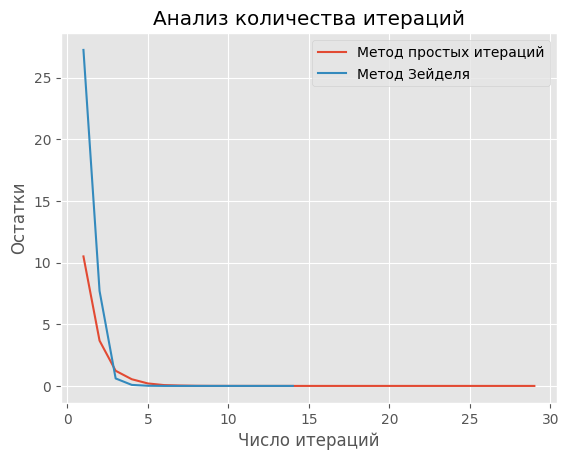

In [12]:
plt.style.use('ggplot')


plt.plot(s_i_iter_history, s_i_res_history, label='Метод простых итераций')
plt.plot(seidel_iter_history, seidel_res_history, label='Метод Зейделя')

plt.title('Анализ количества итераций')
plt.ylabel('Остатки')
plt.xlabel('Число итераций')
plt.legend()

## Задание 1.4

Реализовать метод вращений в виде программы, задавая
в качестве входных данных матрицу и точность вычислений.
Используя разработанное программное обеспечение, найти
собственные значения и собственные векторы симметрических
матриц. Проанализировать зависимость погрешности вычислений
от числа итераций.

1. Реализуем функцию вычисления собственного значения и собственного вектора с помощью метода вращения

In [13]:
def jacobi_rotation(A: list[list[int]], tol=1e-10, max_iter=1000):
    """
    Функция вычисления собственного значения и собственного вектора с помощью метода вращения

    Args:
        A (list[list[int]]):Исходная матрицв
        tol (_type_, optional): Точность вычисления. Defaults to 1e-10.
        max_iter (int, optional): Максимальное число итераций Defaults to 1000.

    Returns:
        tuple[NDArray[Any], NDArray[float64], list[int], list[float]]: Вектор собственных значений, Собственные векторы, история итераций, история остатков
    """
    n = len(A)
    eigenvectors = np.eye(n)
    iteration = 0
    iteration_history = []
    residual_history = []
    while iteration < max_iter:
        max_off_diag = 0
        p = 0
        q = 0

        for i in range(n):
            for j in range(i+1, n):
                if abs(A[i, j]) > max_off_diag:
                    max_off_diag = abs(A[i, j])
                    p = i
                    q = j

        iteration_history.append(iteration+1)
        residual_history.append(max_off_diag)

        if max_off_diag < tol:
            break

        if A[p, p] == A[q, q]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan(2 * A[p, q] / (A[p, p] - A[q, q]))

        c = np.cos(theta)
        s = np.sin(theta)

        R = np.eye(n)
        R[p, p] = c
        R[p, q] = -s
        R[q, p] = s
        R[q, q] = c

        A = np.dot(np.dot(R.T, A), R)
        eigenvectors = np.dot(eigenvectors, R)
        iteration += 1

    eigenvalues = np.diag(A)

    return eigenvalues, eigenvectors, iteration_history, residual_history

2. Сделаем расчеты для варианта

In [14]:
A = np.array([[4, -1, -7],
              [1, 9, 1],
              [-7, 1, 7]])
eigenvalues, eigenvectors, iter_history, res_history = jacobi_rotation(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


Eigenvalues: [-1.63918928  8.92409971 12.71508957]
Eigenvectors:
[[ 0.77768148  0.01419484 -0.62849822]
 [ 0.01402169  0.99910469  0.03991504]
 [ 0.62850211 -0.03985379  0.77678618]]


3. Проведем анализ количества итераций, необходимого для достижения
заданной точности

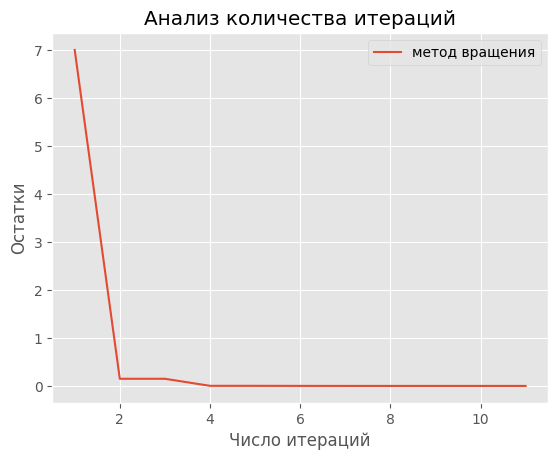

In [15]:
plt.style.use('ggplot')


plt.plot(iter_history, res_history, label='метод вращения')

plt.title('Анализ количества итераций')
plt.ylabel('Остатки')
plt.xlabel('Число итераций')
plt.legend()

## Задание 1.5

Реализовать алгоритм QR – разложения матриц в виде программы.
На его основе разработать программу, реализующую QR – алгоритм
решения полной проблемы собственных значений произвольных матриц,
задавая в качестве входных данных матрицу и точность вычислений.
С использованием разработанного программного обеспечения найти
собственные значения матрицы.

1. Реализуем функцию QR-разложения матрицы

In [16]:
def qr_decomposition(matrix: list[list[int]]):
    """
    Функция QR-разложения матрицы

    Args:
        matrix (list[list[int]]): Исходная матрица

    Returns:
        tuple[NDArray[float64], NDArray[float64]]: Матрицы Q и матрица R
    """
    m, n = matrix.shape
    q = np.zeros((m, n))
    r = np.zeros((n, n))

    for i in range(n):
        v = matrix[:, i]
        for j in range(i):
            r[j, i] = np.dot(q[:, j], matrix[:, i])
            v -= r[j, i] * q[:, j]

        r[i, i] = np.linalg.norm(v)
        q[:, i] = v / r[i, i]

    return q, r

2. Реализуем функцию расчета собственных значений с помощью QR-разложения матрицы

In [17]:
def qr_algorithm(matrix: list[list[int]], epsilon=1e-6, max_iterations=1000):
    """
    Функция расчета собственных значений с помощью QR-разложения матрицы

    Args:
        matrix (list[list[int]]): исходная Матрица
        epsilon (_type_, optional): Точность вычислений. Defaults to 1e-6.
        max_iterations (int, optional): Максимальное число итераций. Defaults to 1000.

    Returns:
        NDArray[Any]: Вектор собственных значений
    """
    current_matrix = matrix.copy()

    for _ in range(max_iterations):
        q, r = qr_decomposition(current_matrix)
        current_matrix = np.dot(r, q)

        if np.linalg.norm(np.triu(current_matrix, k=1)) < epsilon:
            break

    eigenvalues = np.diag(current_matrix)

    return eigenvalues

3. Сделаем расчеты для варианта

In [18]:
A = np.array([[-9, -9, -3],
              [-9, 0, -2],
              [-5, -1, -4]], dtype=float)

eigenvalues = qr_algorithm(A)
print("Собственные значения матрицы:", eigenvalues)

Собственные значения матрицы: [-15.99655029   5.53688394  -2.54033366]
